# Project 1

## Step 1: Load the data and perform basic operations.

##### 1. Load the data in using pandas.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
import seaborn as sns

%matplotlib inline
act_raw_data = pd.read_csv('./../data/act.csv',index_col=0)
sat_raw_data = pd.read_csv('./../data/sat.csv', index_col=0)

##### 2. Print the first ten rows of each dataframe.

In [2]:
act_raw_data.head(10) 

,State,Participation,English,Math,Reading,Science,Composite
0,National,60%,20.3,20.7,21.4,21.0,21.0
1,Alabama,100%,18.9,18.4,19.7,19.4,19.2
2,Alaska,65%,18.7,19.8,20.4,19.9,19.8
3,Arizona,62%,18.6,19.8,20.1,19.8,19.7
4,Arkansas,100%,18.9,19.0,19.7,19.5,19.4
5,California,31%,22.5,22.7,23.1,22.2,22.8
6,Colorado,100%,20.1,20.3,21.2,20.9,20.8
7,Connecticut,31%,25.5,24.6,25.6,24.6,25.2
8,Delaware,18%,24.1,23.4,24.8,23.6,24.1
9,District of Columbia,32%,24.4,23.5,24.9,23.5,24.2


In [3]:
act_raw_data.describe() #science min seems quite small

,English,Math,Reading,Science,Composite
count,52.000000,52.000000,52.000000,52.000000,52.000000
mean,20.919231,21.173077,22.001923,21.040385,21.509615
std,2.332132,1.963602,2.048672,3.151113,2.002083
min,16.300000,18.000000,18.100000,2.300000,17.800000
25%,19.000000,19.400000,20.475000,19.900000,19.800000
50%,20.550000,20.900000,21.700000,21.150000,21.400000
75%,23.300000,23.100000,24.125000,22.525000,23.600000
max,25.500000,25.300000,26.000000,24.900000,25.500000


In [4]:
sat_raw_data.describe() #math min seems quite small

,Evidence-Based Reading and Writing,Math,Total
count,51.000000,51.000000,51.000000
mean,569.117647,547.627451,1126.098039
std,45.666901,84.909119,92.494812
min,482.000000,52.000000,950.000000
25%,533.500000,522.000000,1055.500000
50%,559.000000,548.000000,1107.000000
75%,613.000000,599.000000,1212.000000
max,644.000000,651.000000,1295.000000


The outliner in math doesn't seem right


##### 3. Describe in words what each variable (column) is.

-State: result summarized by states

-Participation: the percentage of high scholl graduates who took the exam in that state

-Subjects(math, reading...): it is the score for each subject

##### 4. Does the data look complete? Are there any obvious issues with the observations?

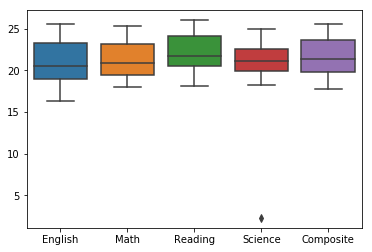

In [5]:
#plot eda graph
sns.boxplot(data = act_raw_data) #science score outlier doesn't seem right

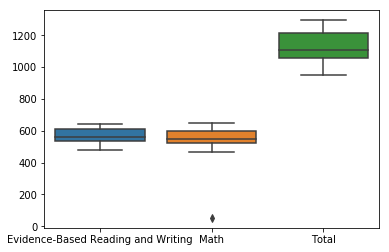

In [6]:
sns.boxplot(data=sat_raw_data) #math score outlier doesn't seem right

In [7]:
act_raw_data.isna().sum() #no empty cell

State            0
Participation    0
English          0
Math             0
Reading          0
Science          0
Composite        0
dtype: int64

In [8]:
sat_raw_data.isna().sum() #no empty cell

State                                 0
Participation                         0
Evidence-Based Reading and Writing    0
Math                                  0
Total                                 0
dtype: int64

1. there are some outliers
2. participation is not integer or string

##### 5. Print the types of each column.

In [9]:
act_raw_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 52 entries, 0 to 51
Data columns (total 7 columns):
State            52 non-null object
Participation    52 non-null object
English          52 non-null float64
Math             52 non-null float64
Reading          52 non-null float64
Science          52 non-null float64
Composite        52 non-null float64
dtypes: float64(5), object(2)
memory usage: 3.2+ KB


In [10]:
sat_raw_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 51 entries, 0 to 50
Data columns (total 5 columns):
State                                 51 non-null object
Participation                         51 non-null object
Evidence-Based Reading and Writing    51 non-null int64
Math                                  51 non-null int64
Total                                 51 non-null int64
dtypes: int64(3), object(2)
memory usage: 2.4+ KB


##### 6. Do any types need to be reassigned? If so, go ahead and do it.

In [11]:
sat_raw_data[sat_raw_data['Math'] == sat_raw_data['Math'].min()]

,State,Participation,Evidence-Based Reading and Writing,Math,Total
20,Maryland,69%,536,52,1060


In [12]:
# Re-calculate SAT math score from Marland

sat_raw_data.loc[20,'Math'] = sat_raw_data.loc[20,'Total'] - sat_raw_data.loc[20,'Evidence-Based Reading and Writing']

In [13]:
act_raw_data[act_raw_data['Science'] == act_raw_data['Science'].min()]

,State,Participation,English,Math,Reading,Science,Composite
21,Maryland,28%,23.3,23.1,24.2,2.3,23.6


In [14]:
# Reassigned Science score of Maryland, score found on ACT website (https://www.act.org/content/dam/act/unsecured/documents/cccr2017/ACT_2017-Average_Scores_by_State.pdf)
act_raw_data.loc[21,'Science'] = 23.2

In [15]:
# Convert string in 'participation' to float
act_raw_data['Participation_float'] = act_raw_data['Participation'].str.replace('%',"")
act_raw_data['Participation_float'] = act_raw_data['Participation_float'].astype(float)/100

In [16]:
sat_raw_data['Participation_float'] = sat_raw_data['Participation'].str.replace('%',"")
sat_raw_data['Participation_float'] = sat_raw_data['Participation_float'].astype(float)/100

##### 7. Create a dictionary for each column mapping the State to its respective value for that column. (For example, you should have three SAT dictionaries.)

In [17]:
sat_raw_data_orient = sat_raw_data.set_index('State').T
sat_dict = sat_raw_data_orient.to_dict('dict')
sat_dict.keys()

dict_keys(['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California', 'Colorado', 'Connecticut', 'Delaware', 'District of Columbia', 'Florida', 'Georgia', 'Hawaii', 'Idaho', 'Illinois', 'Indiana', 'Iowa', 'Kansas', 'Kentucky', 'Louisiana', 'Maine', 'Maryland', 'Massachusetts', 'Michigan', 'Minnesota', 'Mississippi', 'Missouri', 'Montana', 'Nebraska', 'Nevada', 'New Hampshire', 'New Jersey', 'New Mexico', 'New York', 'North Carolina', 'North Dakota', 'Ohio', 'Oklahoma', 'Oregon', 'Pennsylvania', 'Rhode Island', 'South Carolina', 'South Dakota', 'Tennessee', 'Texas', 'Utah', 'Vermont', 'Virginia', 'Washington', 'West Virginia', 'Wisconsin', 'Wyoming'])

In [18]:
act_raw_data_orient = act_raw_data.set_index('State').T
act_dict = act_raw_data_orient.to_dict('dict')
act_dict.keys()

dict_keys(['National', 'Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California', 'Colorado', 'Connecticut', 'Delaware', 'District of Columbia', 'Florida', 'Georgia', 'Hawaii', 'Idaho', 'Illinois', 'Indiana', 'Iowa', 'Kansas', 'Kentucky', 'Louisiana', 'Maine', 'Maryland', 'Massachusetts', 'Michigan', 'Minnesota', 'Mississippi', 'Missouri', 'Montana', 'Nebraska', 'Nevada', 'New Hampshire', 'New Jersey', 'New Mexico', 'New York', 'North Carolina', 'North Dakota', 'Ohio', 'Oklahoma', 'Oregon', 'Pennsylvania', 'Rhode Island', 'South Carolina', 'South Dakota', 'Tennessee', 'Texas', 'Utah', 'Vermont', 'Virginia', 'Washington', 'West Virginia', 'Wisconsin', 'Wyoming'])

##### 8. Create one dictionary where each key is the column name, and each value is an iterable (a list or a Pandas Series) of all the values in that column.

In [19]:
sat_col_dict = sat_raw_data.to_dict('list')
sat_col_dict

{'State': ['Alabama',
  'Alaska',
  'Arizona',
  'Arkansas',
  'California',
  'Colorado',
  'Connecticut',
  'Delaware',
  'District of Columbia',
  'Florida',
  'Georgia',
  'Hawaii',
  'Idaho',
  'Illinois',
  'Indiana',
  'Iowa',
  'Kansas',
  'Kentucky',
  'Louisiana',
  'Maine',
  'Maryland',
  'Massachusetts',
  'Michigan',
  'Minnesota',
  'Mississippi',
  'Missouri',
  'Montana',
  'Nebraska',
  'Nevada',
  'New Hampshire',
  'New Jersey',
  'New Mexico',
  'New York',
  'North Carolina',
  'North Dakota',
  'Ohio',
  'Oklahoma',
  'Oregon',
  'Pennsylvania',
  'Rhode Island',
  'South Carolina',
  'South Dakota',
  'Tennessee',
  'Texas',
  'Utah',
  'Vermont',
  'Virginia',
  'Washington',
  'West Virginia',
  'Wisconsin',
  'Wyoming'],
 'Participation': ['5%',
  '38%',
  '30%',
  '3%',
  '53%',
  '11%',
  '100%',
  '100%',
  '100%',
  '83%',
  '61%',
  '55%',
  '93%',
  '9%',
  '63%',
  '2%',
  '4%',
  '4%',
  '4%',
  '95%',
  '69%',
  '76%',
  '100%',
  '3%',
  '2%',
  '3%

In [20]:
act_col_dict = act_raw_data.to_dict('list')
act_col_dict.keys()

dict_keys(['State', 'Participation', 'English', 'Math', 'Reading', 'Science', 'Composite', 'Participation_float'])

##### 9. Merge the dataframes on the state column.

In [21]:
# use inner merger to exclude national row from ACT
comb_df = pd.merge(act_raw_data, sat_raw_data, how='inner', on='State')
comb_df.head()

,State,Participation_x,English,Math_x,Reading,Science,Composite,Participation_float_x,Participation_y,Evidence-Based Reading and Writing,Math_y,Total,Participation_float_y
0,Alabama,100%,18.9,18.4,19.7,19.4,19.2,1.00,5%,593,572,1165,0.05
1,Alaska,65%,18.7,19.8,20.4,19.9,19.8,0.65,38%,547,533,1080,0.38
2,Arizona,62%,18.6,19.8,20.1,19.8,19.7,0.62,30%,563,553,1116,0.30
3,Arkansas,100%,18.9,19.0,19.7,19.5,19.4,1.00,3%,614,594,1208,0.03
4,California,31%,22.5,22.7,23.1,22.2,22.8,0.31,53%,531,524,1055,0.53


##### 10. Change the names of the columns so you can distinguish between the SAT columns and the ACT columns.

In [22]:
new_columns_dict = {
    'State': 'State',
    'Participation_x': 'Participation_ACT', 
    'English': 'English_ACT', 
    'Math_x': 'Math_ACT', 
    'Reading': 'Reading_ACT', 
    'Science': 'Science_ACT',
    'Composite': 'Composite_ACT', 
    'Participation_float_x': 'Participation_float_ACT', 
    'Participation_y': 'Participation_SAT', 
    'Evidence-Based Reading and Writing': 'Reading_SAT', 
    'Math_y': 'Math_SAT',
    'Total': 'Total_SAT',
    'Participation_float_y': 'Participation_float_SAT'}

In [23]:
comb_df_col = comb_df.rename(columns=new_columns_dict)

In [24]:
comb_df_col.head()

,State,Participation_ACT,English_ACT,Math_ACT,Reading_ACT,Science_ACT,Composite_ACT,Participation_float_ACT,Participation_SAT,Reading_SAT,Math_SAT,Total_SAT,Participation_float_SAT
0,Alabama,100%,18.9,18.4,19.7,19.4,19.2,1.00,5%,593,572,1165,0.05
1,Alaska,65%,18.7,19.8,20.4,19.9,19.8,0.65,38%,547,533,1080,0.38
2,Arizona,62%,18.6,19.8,20.1,19.8,19.7,0.62,30%,563,553,1116,0.30
3,Arkansas,100%,18.9,19.0,19.7,19.5,19.4,1.00,3%,614,594,1208,0.03
4,California,31%,22.5,22.7,23.1,22.2,22.8,0.31,53%,531,524,1055,0.53


In [25]:
comb_df_col.columns

Index(['State', 'Participation_ACT', 'English_ACT', 'Math_ACT', 'Reading_ACT',
       'Science_ACT', 'Composite_ACT', 'Participation_float_ACT',
       'Participation_SAT', 'Reading_SAT', 'Math_SAT', 'Total_SAT',
       'Participation_float_SAT'],
      dtype='object')

##### 11. Print the minimum and maximum of each numeric column in the data frame.

In [26]:
comb_df_col._get_numeric_data().max()

English_ACT                  25.5
Math_ACT                     25.3
Reading_ACT                  26.0
Science_ACT                  24.9
Composite_ACT                25.5
Participation_float_ACT       1.0
Reading_SAT                 644.0
Math_SAT                    651.0
Total_SAT                  1295.0
Participation_float_SAT       1.0
dtype: float64

In [27]:
comb_df_col._get_numeric_data().min()

English_ACT                 16.30
Math_ACT                    18.00
Reading_ACT                 18.10
Science_ACT                 18.20
Composite_ACT               17.80
Participation_float_ACT      0.08
Reading_SAT                482.00
Math_SAT                   468.00
Total_SAT                  950.00
Participation_float_SAT      0.02
dtype: float64

##### 12. Write a function using only list comprehensions, no loops, to compute standard deviation. Using this function, calculate the standard deviation of each numeric column in both data sets. Add these to a list called `sd`.

$$\sigma = \sqrt{\frac{1}{n}\sum_{i=1}^n(x_i - \mu)^2}$$

In [28]:
#create participation float column to replace 
comb_df_col.drop('Participation_SAT', axis=1,inplace=True)

In [29]:
#create participation float column to replace 
comb_df_col.drop('Participation_ACT', axis=1,inplace=True)

In [30]:
numeric_col = comb_df_col.drop('State', axis=1)

In [31]:
#create a function to calculate standard deviation without using np.std and for loop
def std_dev(col):
    ### col: the column name on datafram###
    
    deviation = numeric_col[col] - np.mean(numeric_col[col])
    sum_square_deviation = np.sum(deviation **2)
    variance = sum_square_deviation/len(numeric_col[col])
    std_dev = variance**0.5                                
    return std_dev

In [32]:
numeric_col.head()

,English_ACT,Math_ACT,Reading_ACT,Science_ACT,Composite_ACT,Participation_float_ACT,Reading_SAT,Math_SAT,Total_SAT,Participation_float_SAT
0,18.9,18.4,19.7,19.4,19.2,1.00,593,572,1165,0.05
1,18.7,19.8,20.4,19.9,19.8,0.65,547,533,1080,0.38
2,18.6,19.8,20.1,19.8,19.7,0.62,563,553,1116,0.30
3,18.9,19.0,19.7,19.5,19.4,1.00,614,594,1208,0.03
4,22.5,22.7,23.1,22.2,22.8,0.31,531,524,1055,0.53


In [33]:
std_dev_df = pd.DataFrame()
std_dev_df['cat'] = [i for i in numeric_col]
std_dev_df['std_dev'] = [std_dev(i) for i in numeric_col]
std_dev_df.set_index('cat', inplace=True)
std_dev_df

,std_dev
cat,
English_ACT,2.330488
Math_ACT,1.962462
Reading_ACT,2.046903
Science_ACT,1.722216
Composite_ACT,2.000786
Participation_float_ACT,0.318242
Reading_SAT,45.216970
Math_SAT,46.657134
Total_SAT,91.583511


In [34]:
np.std(numeric_col, ddof=0) # use np.std to check the my function above

English_ACT                 2.330488
Math_ACT                    1.962462
Reading_ACT                 2.046903
Science_ACT                 1.722216
Composite_ACT               2.000786
Participation_float_ACT     0.318242
Reading_SAT                45.216970
Math_SAT                   46.657134
Total_SAT                  91.583511
Participation_float_SAT     0.349291
dtype: float64

In [35]:
sd = std_dev_df['std_dev'].tolist()
sd

[2.3304876369363368,
 1.9624620273436781,
 2.046902931484265,
 1.7222161451443672,
 2.0007860815819893,
 0.31824175751231804,
 45.21697020437866,
 46.65713364485504,
 91.58351056778743,
 0.3492907076664507]

## Step 2: Manipulate the dataframe

##### 13. Turn the list `sd` into a new observation in your dataset.

In [36]:
stats_info = numeric_col.describe().T

In [37]:
stats_info['sd'] = sd #add a column on (df.describe) to show 'sd'

In [38]:
stats_info

,count,mean,std,min,25%,50%,75%,max,sd
English_ACT,51.0,20.931373,2.353677,16.30,19.00,20.70,23.30,25.5,2.330488
Math_ACT,51.0,21.182353,1.981989,18.00,19.40,20.90,23.10,25.3,1.962462
Reading_ACT,51.0,22.013725,2.067271,18.10,20.45,21.80,24.15,26.0,2.046903
Science_ACT,51.0,21.450980,1.739353,18.20,19.95,21.30,23.20,24.9,1.722216
Composite_ACT,51.0,21.519608,2.020695,17.80,19.80,21.40,23.60,25.5,2.000786
Participation_float_ACT,51.0,0.652549,0.321408,0.08,0.31,0.69,1.00,1.0,0.318242
Reading_SAT,51.0,569.117647,45.666901,482.00,533.50,559.00,613.00,644.0,45.216970
Math_SAT,51.0,556.882353,47.121395,468.00,523.50,548.00,599.00,651.0,46.657134
Total_SAT,51.0,1126.098039,92.494812,950.00,1055.50,1107.00,1212.00,1295.0,91.583511
Participation_float_SAT,51.0,0.398039,0.352766,0.02,0.04,0.38,0.66,1.0,0.349291


##### 14. Sort the dataframe by the values in a numeric column (e.g. observations descending by SAT participation rate)

In [39]:
comb_df_col.sort_values(by=['Participation_float_ACT'],ascending=False).head(10)

,State,English_ACT,Math_ACT,Reading_ACT,Science_ACT,Composite_ACT,Participation_float_ACT,Reading_SAT,Math_SAT,Total_SAT,Participation_float_SAT
0,Alabama,18.9,18.4,19.7,19.4,19.2,1.0,593,572,1165,0.05
17,Kentucky,19.6,19.4,20.5,20.1,20.0,1.0,631,616,1247,0.04
49,Wisconsin,19.7,20.4,20.6,20.9,20.5,1.0,642,649,1291,0.03
44,Utah,19.5,19.9,20.8,20.6,20.3,1.0,624,614,1238,0.03
42,Tennessee,19.5,19.2,20.1,19.9,19.8,1.0,623,604,1228,0.05
40,South Carolina,17.5,18.6,19.1,18.9,18.7,1.0,543,521,1064,0.50
36,Oklahoma,18.5,18.8,20.1,19.6,19.4,1.0,530,517,1047,0.07
33,North Carolina,17.8,19.3,19.6,19.3,19.1,1.0,546,535,1081,0.49
28,Nevada,16.3,18.0,18.1,18.2,17.8,1.0,563,553,1116,0.26
26,Montana,19.0,20.2,21.0,20.5,20.3,1.0,605,591,1196,0.10


##### 15. Use a boolean filter to display only observations with a score above a certain threshold (e.g. only states with a participation rate above 50%)

In [40]:
comb_df_col[(comb_df_col['Participation_float_ACT']>=0.5) & (comb_df_col['Participation_float_SAT']>=0.5)]

,State,English_ACT,Math_ACT,Reading_ACT,Science_ACT,Composite_ACT,Participation_float_ACT,Reading_SAT,Math_SAT,Total_SAT,Participation_float_SAT
9,Florida,19.0,19.4,21.0,19.4,19.8,0.73,520,497,1017,0.83
10,Georgia,21.0,20.9,22.0,21.3,21.4,0.55,535,515,1050,0.61
11,Hawaii,17.8,19.2,19.2,19.3,19.0,0.90,544,541,1085,0.55
40,South Carolina,17.5,18.6,19.1,18.9,18.7,1.00,543,521,1064,0.50


## Step 3: Visualize the data

##### 16. Using MatPlotLib and PyPlot, plot the distribution of the Rate columns for both SAT and ACT using histograms. (You should have two histograms. You might find [this link](https://matplotlib.org/users/pyplot_tutorial.html#working-with-multiple-figures-and-axes) helpful in organizing one plot above the other.) 

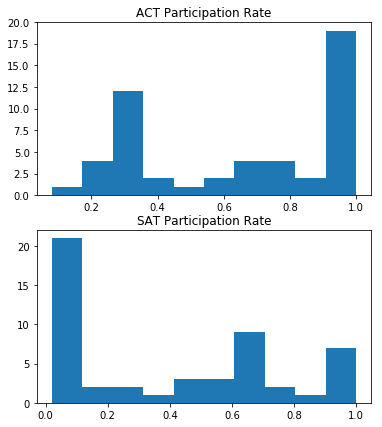

In [41]:
f, ax = plt.subplots(2, figsize=(6,7))
ax[0].hist(comb_df_col['Participation_float_ACT']);
ax[0].title.set_text('ACT Participation Rate')
ax[1].hist(comb_df_col['Participation_float_SAT']);
ax[1].title.set_text('SAT Participation Rate')


##### 17. Plot the Math(s) distributions from both data sets.

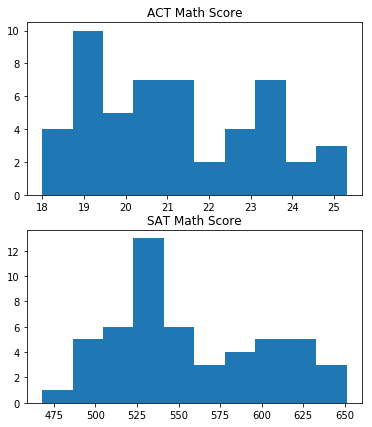

In [42]:
f, ax = plt.subplots(2, figsize=(6,7))
ax[0].hist(comb_df_col['Math_ACT']);
ax[0].title.set_text('ACT Math Score')
ax[1].hist(comb_df_col['Math_SAT']);
ax[1].title.set_text('SAT Math Score')

##### 18. Plot the Verbal distributions from both data sets.

In [43]:
comb_df_col.head()

,State,English_ACT,Math_ACT,Reading_ACT,Science_ACT,Composite_ACT,Participation_float_ACT,Reading_SAT,Math_SAT,Total_SAT,Participation_float_SAT
0,Alabama,18.9,18.4,19.7,19.4,19.2,1.00,593,572,1165,0.05
1,Alaska,18.7,19.8,20.4,19.9,19.8,0.65,547,533,1080,0.38
2,Arizona,18.6,19.8,20.1,19.8,19.7,0.62,563,553,1116,0.30
3,Arkansas,18.9,19.0,19.7,19.5,19.4,1.00,614,594,1208,0.03
4,California,22.5,22.7,23.1,22.2,22.8,0.31,531,524,1055,0.53


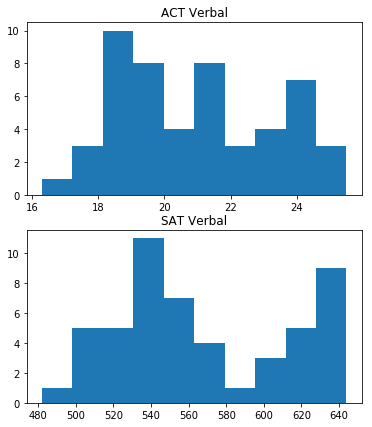

In [44]:
f, ax = plt.subplots(2, figsize=(6,7))
ax[0].hist(comb_df_col['English_ACT']);
ax[0].title.set_text('ACT Verbal')
ax[1].hist(comb_df_col['Reading_SAT']);
ax[1].title.set_text('SAT Verbal')

##### 19. When we make assumptions about how data are distributed, what is the most common assumption?

##### 20. Does this assumption hold true for any of our columns? Which?

In [45]:
# calculate p-value to see whether if the score is norally distributed 

In [46]:
comb_df_col.describe()

,English_ACT,Math_ACT,Reading_ACT,Science_ACT,Composite_ACT,Participation_float_ACT,Reading_SAT,Math_SAT,Total_SAT,Participation_float_SAT
count,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000
mean,20.931373,21.182353,22.013725,21.450980,21.519608,0.652549,569.117647,556.882353,1126.098039,0.398039
std,2.353677,1.981989,2.067271,1.739353,2.020695,0.321408,45.666901,47.121395,92.494812,0.352766
min,16.300000,18.000000,18.100000,18.200000,17.800000,0.080000,482.000000,468.000000,950.000000,0.020000
25%,19.000000,19.400000,20.450000,19.950000,19.800000,0.310000,533.500000,523.500000,1055.500000,0.040000
50%,20.700000,20.900000,21.800000,21.300000,21.400000,0.690000,559.000000,548.000000,1107.000000,0.380000
75%,23.300000,23.100000,24.150000,23.200000,23.600000,1.000000,613.000000,599.000000,1212.000000,0.660000
max,25.500000,25.300000,26.000000,24.900000,25.500000,1.000000,644.000000,651.000000,1295.000000,1.000000


In [47]:
def norm_test(col):
    nt = stats.normaltest(numeric_col[col])
    return nt

In [48]:
[print('{} has {}'.format(i, (norm_test(i)))) for i in numeric_col]

English_ACT has NormaltestResult(statistic=4.945616782086351, pvalue=0.08434764489205682)
Math_ACT has NormaltestResult(statistic=6.547294554392776, pvalue=0.03786805958606832)
Reading_ACT has NormaltestResult(statistic=6.248639549660324, pvalue=0.04396683079879635)
Science_ACT has NormaltestResult(statistic=5.501326521192349, pvalue=0.0638854744336635)
Composite_ACT has NormaltestResult(statistic=6.557389886662569, pvalue=0.03767739587231253)
Participation_float_ACT has NormaltestResult(statistic=72.50510406893649, pvalue=1.8018419611696658e-16)
Reading_SAT has NormaltestResult(statistic=13.81815328788405, pvalue=0.0009986795076584)
Math_SAT has NormaltestResult(statistic=5.762201767738943, pvalue=0.056072998982864684)
Total_SAT has NormaltestResult(statistic=9.607185954097002, pvalue=0.008200230814088539)
Participation_float_SAT has NormaltestResult(statistic=24.84401282693096, pvalue=4.02894334576706e-06)


[None, None, None, None, None, None, None, None, None, None]

In [49]:
def skew_test(col):
    sk = stats.skew(numeric_col[col])
    return sk

In [50]:
[skew_test(i) for i in numeric_col]

[0.34220217359811805,
 0.3228174361152988,
 0.2613779187300745,
 0.21233390930923077,
 0.3103255637098951,
 -0.19211796242279894,
 0.2646065965076702,
 0.35421485843432615,
 0.30168334986069095,
 0.33617543925343585]

It seems like all the distributions have some skewness. 

##### 21. Plot some scatterplots examining relationships between all variables.

In [51]:
add_act_totoal = pd.DataFrame()
add_act_totoal = numeric_col

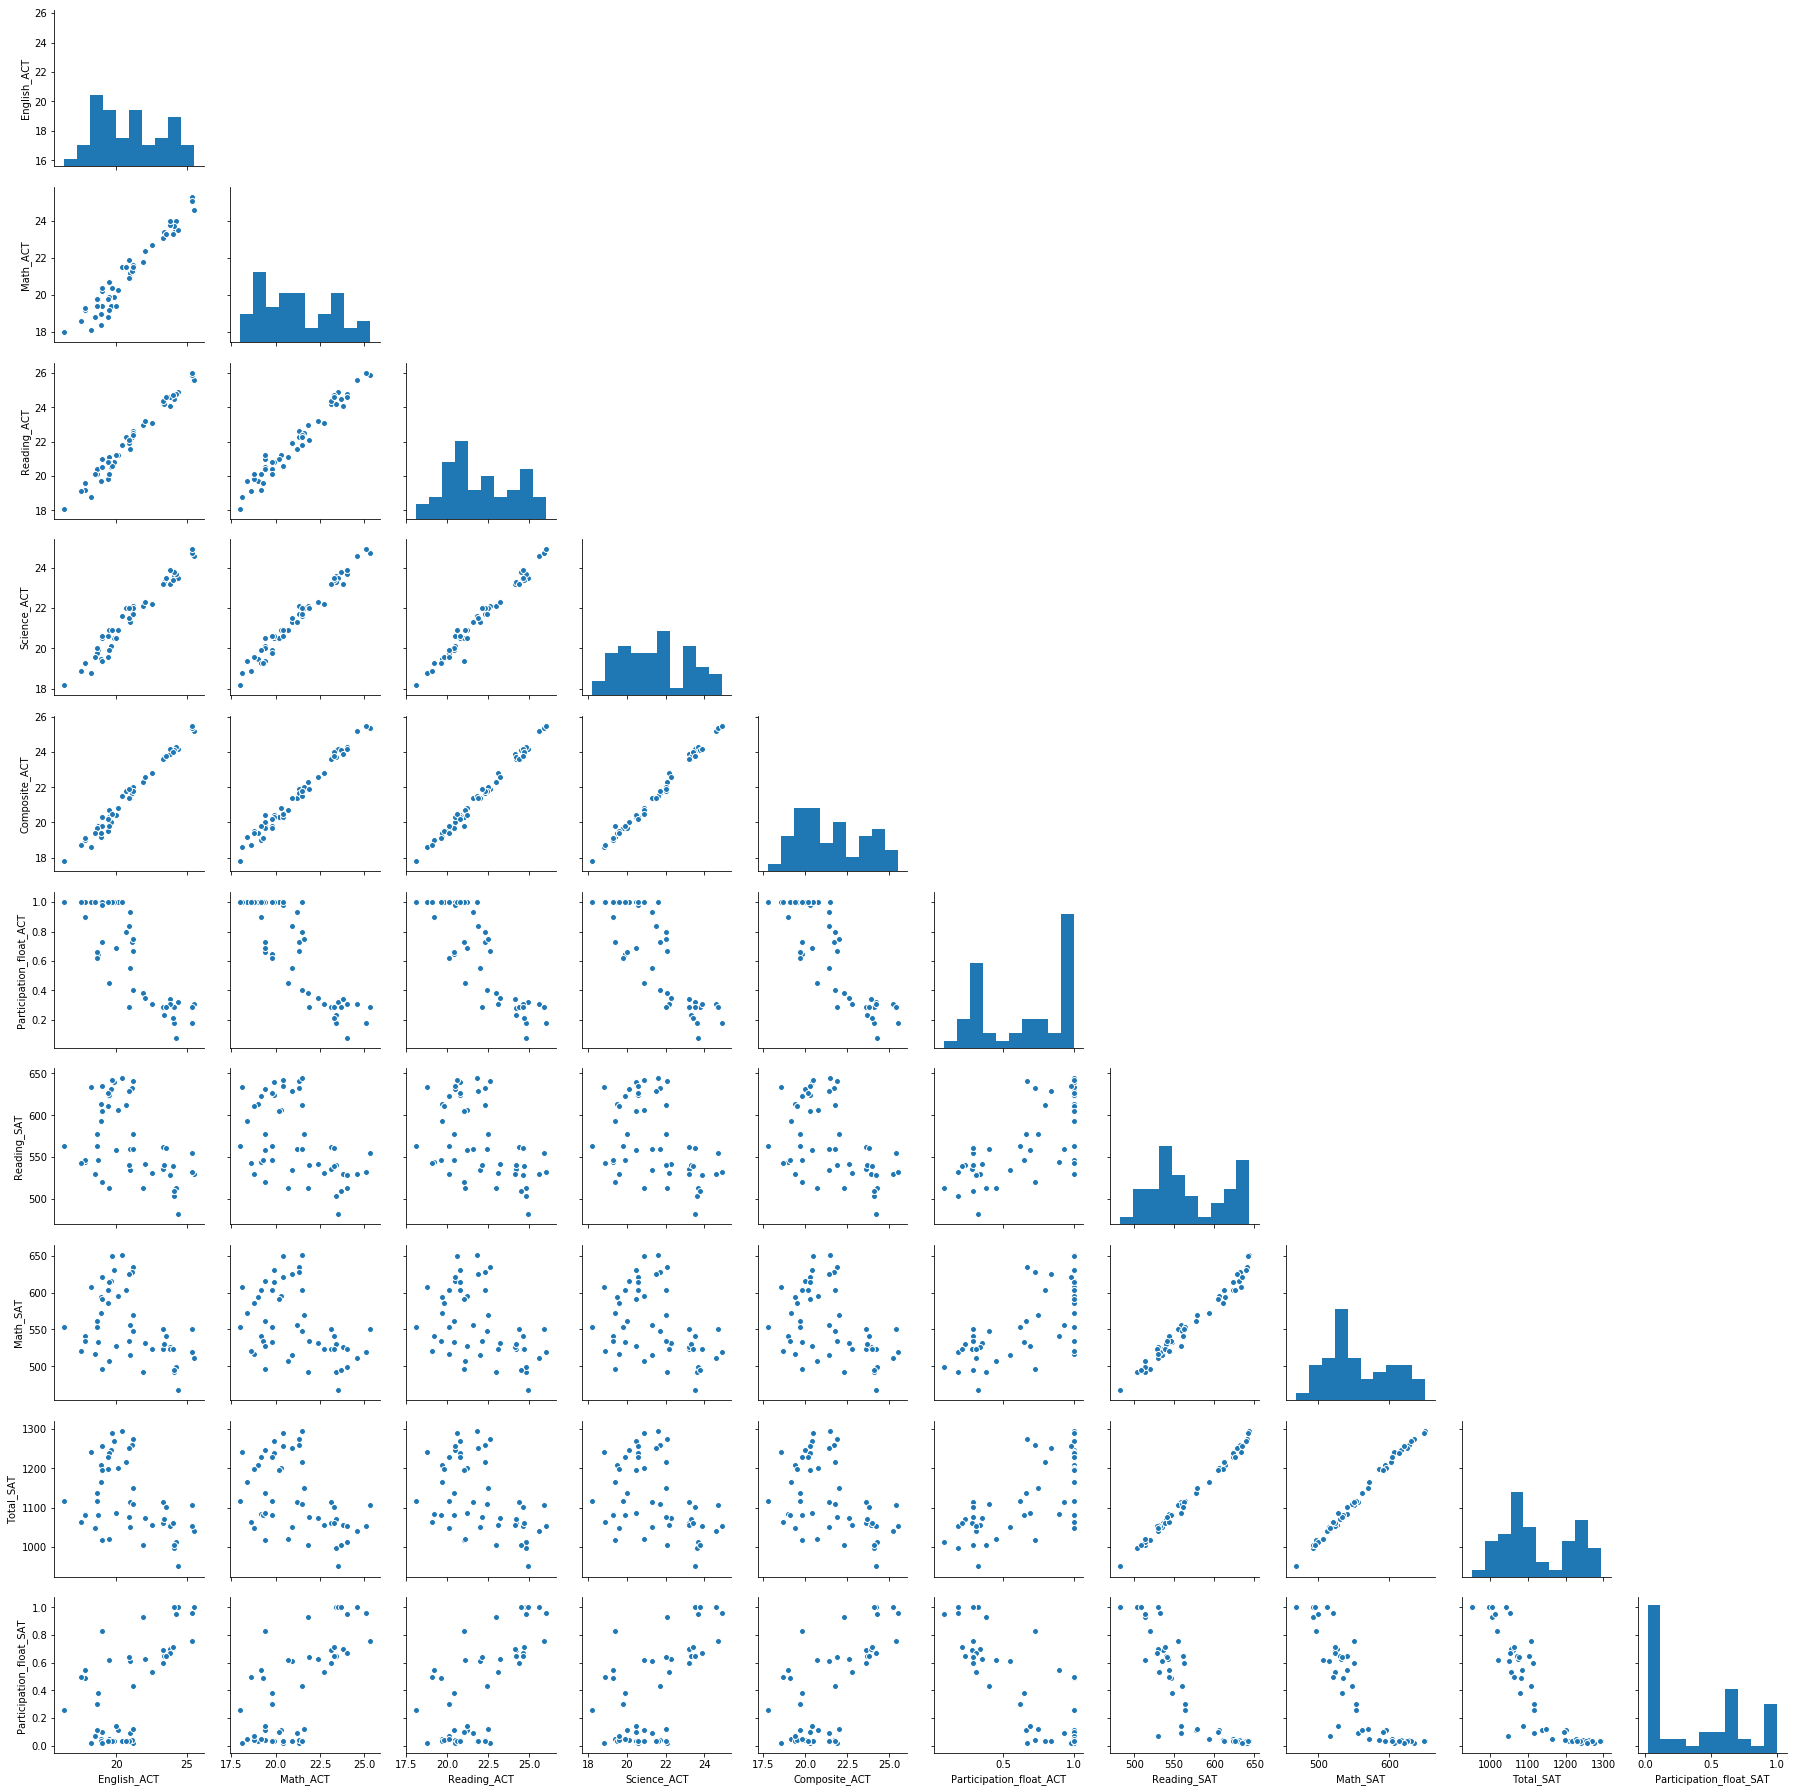

In [52]:
g = sns.pairplot(add_act_totoal) # plot scatter to see the correlations
for i, j in zip(*np.triu_indices_from(g.axes, 1)):
    g.axes[i, j].set_visible(False)

In [53]:
corr_matrix = add_act_totoal.corr()

In [54]:
corr_matrix.iloc[:6,7:11]

,Math_SAT,Total_SAT,Participation_float_SAT
English_ACT,-0.420673,-0.441947,0.686889
Math_ACT,-0.420456,-0.454116,0.710697
Reading_ACT,-0.442410,-0.466558,0.705352
Science_ACT,-0.365515,-0.394559,0.653670
Composite_ACT,-0.417817,-0.445020,0.694748
Participation_float_ACT,0.682572,0.701477,-0.841234


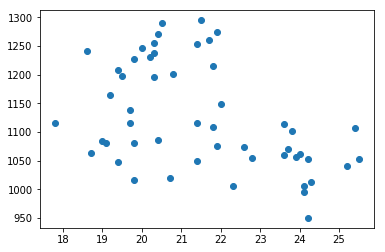

In [55]:
plt.scatter(add_act_totoal['Composite_ACT'], add_act_totoal['Total_SAT'])

##### 22. Are there any interesting relationships to note?

1. if a state has high test score, the students at that state are likely to take another test. 

2. the relation between overall ACT score and SAT score is not significant

3. Score dispersion between two tests; ACT score is more spread than SAT(C.V.)

4. ACT, SAT participation is varied greatly.

5. Midwest is dominate on SAT score but east coast has the highest ACT score


##### 23. Create box plots for each variable. 

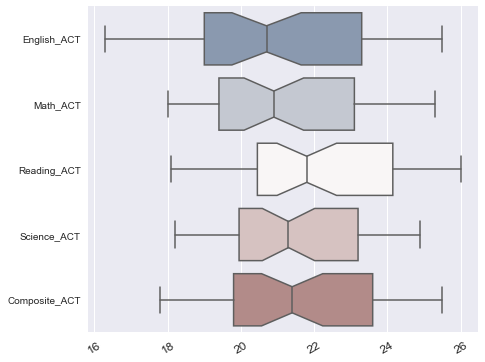

In [56]:
sns.set()
fig = plt.figure(figsize=(7,6))
ax = fig.gca()
ax = sns.boxplot(data = add_act_totoal[['English_ACT','Math_ACT','Reading_ACT', 'Science_ACT', 'Composite_ACT']], 
            fliersize=8, linewidth=1.5, notch=True, saturation=0.5,orient='h', ax=ax, palette='vlag');
plt.xticks(rotation=30, fontsize = 12); #draw a verticle line to show the mean act score


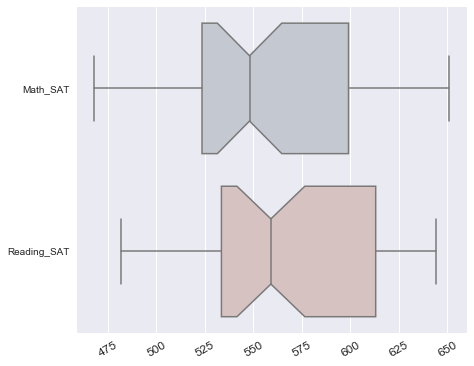

In [57]:
fig = plt.figure(figsize=(7,6))
ax = fig.gca()
ax = sns.boxplot(data = add_act_totoal[['Math_SAT','Reading_SAT']], 
            fliersize=8, linewidth=1.5, notch=True, saturation=0.5,orient='h', ax=ax, palette='vlag');
plt.xticks(rotation=30, fontsize = 12);

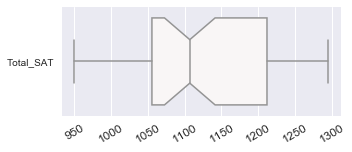

In [58]:
fig = plt.figure(figsize=(5,2))
ax = fig.gca()
ax = sns.boxplot(data = add_act_totoal[['Total_SAT']], 
            fliersize=8, linewidth=1.5, notch=True, saturation=0.5,orient='h', ax=ax, palette='vlag');
plt.xticks(rotation=30, fontsize = 12);

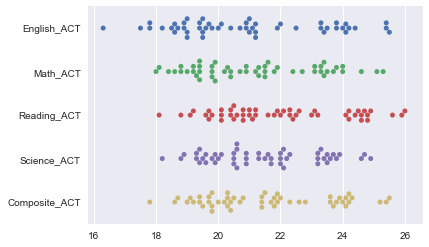

In [59]:
sns.swarmplot(data = add_act_totoal[['English_ACT','Math_ACT','Reading_ACT', 'Science_ACT', 'Composite_ACT']],
             orient='h');

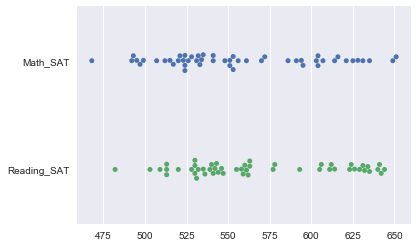

In [60]:
sns.swarmplot(data = add_act_totoal[['Math_SAT','Reading_SAT']],orient='h');

##### BONUS: Using Tableau, create a heat map for each variable using a map of the US. 

Heat map link:
https://public.tableau.com/profile/jonathan.zhao#!/vizhome/SATandACTscore2017/Sheet1?publish=yes

In [61]:
%%HTML
<div class='tableauPlaceholder' id='viz1533950263632' style='position: relative'><noscript><a href='#'><img alt='&lt;SAT&#47;ACT Total Score&gt; ' src='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;SA&#47;SATandACTscore2017&#47;Score&#47;1_rss.png' style='border: none' /></a></noscript><object class='tableauViz'  style='display:none;'><param name='host_url' value='https%3A%2F%2Fpublic.tableau.com%2F' /> <param name='embed_code_version' value='3' /> <param name='site_root' value='' /><param name='name' value='SATandACTscore2017&#47;Score' /><param name='tabs' value='no' /><param name='toolbar' value='yes' /><param name='static_image' value='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;SA&#47;SATandACTscore2017&#47;Score&#47;1.png' /> <param name='animate_transition' value='yes' /><param name='display_static_image' value='yes' /><param name='display_spinner' value='yes' /><param name='display_overlay' value='yes' /><param name='display_count' value='yes' /><param name='filter' value='publish=yes' /></object></div>                <script type='text/javascript'>                    var divElement = document.getElementById('viz1533950263632');                    var vizElement = divElement.getElementsByTagName('object')[0];                    vizElement.style.width='100%';vizElement.style.height=(divElement.offsetWidth*0.75)+'px';                    var scriptElement = document.createElement('script');                    scriptElement.src = 'https://public.tableau.com/javascripts/api/viz_v1.js';                    vizElement.parentNode.insertBefore(scriptElement, vizElement);                </script>

<div class='tableauPlaceholder' id='viz1533950263632' style='position: relative'><noscript><a href='#'><img alt='&lt;SAT&#47;ACT Total Score&gt; ' src='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;SA&#47;SATandACTscore2017&#47;Score&#47;1_rss.png' style='border: none' /></a></noscript><object class='tableauViz'  style='display:none;'><param name='host_url' value='https%3A%2F%2Fpublic.tableau.com%2F' /> <param name='embed_code_version' value='3' /> <param name='site_root' value='' /><param name='name' value='SATandACTscore2017&#47;Score' /><param name='tabs' value='no' /><param name='toolbar' value='yes' /><param name='static_image' value='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;SA&#47;SATandACTscore2017&#47;Score&#47;1.png' /> <param name='animate_transition' value='yes' /><param name='display_static_image' value='yes' /><param name='display_spinner' value='yes' /><param name='display_overlay' value='yes' /><param name='display_count' value='yes' /><param name='filter' value='publish=yes' /></object></div>                <script type='text/javascript'>                    var divElement = document.getElementById('viz1533950263632');                    var vizElement = divElement.getElementsByTagName('object')[0];                    vizElement.style.width='100%';vizElement.style.height=(divElement.offsetWidth*0.75)+'px';                    var scriptElement = document.createElement('script');                    scriptElement.src = 'https://public.tableau.com/javascripts/api/viz_v1.js';                    vizElement.parentNode.insertBefore(scriptElement, vizElement);                </script>

## Step 4: Descriptive and Inferential Statistics

##### 24. Summarize each distribution. As data scientists, be sure to back up these summaries with statistics. (Hint: What are the three things we care about when describing distributions?)

In [62]:
add_act_totoal.describe()

,English_ACT,Math_ACT,Reading_ACT,Science_ACT,Composite_ACT,Participation_float_ACT,Reading_SAT,Math_SAT,Total_SAT,Participation_float_SAT
count,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000
mean,20.931373,21.182353,22.013725,21.450980,21.519608,0.652549,569.117647,556.882353,1126.098039,0.398039
std,2.353677,1.981989,2.067271,1.739353,2.020695,0.321408,45.666901,47.121395,92.494812,0.352766
min,16.300000,18.000000,18.100000,18.200000,17.800000,0.080000,482.000000,468.000000,950.000000,0.020000
25%,19.000000,19.400000,20.450000,19.950000,19.800000,0.310000,533.500000,523.500000,1055.500000,0.040000
50%,20.700000,20.900000,21.800000,21.300000,21.400000,0.690000,559.000000,548.000000,1107.000000,0.380000
75%,23.300000,23.100000,24.150000,23.200000,23.600000,1.000000,613.000000,599.000000,1212.000000,0.660000
max,25.500000,25.300000,26.000000,24.900000,25.500000,1.000000,644.000000,651.000000,1295.000000,1.000000


# ACT:
Among five subjects in ACT, English score is the most dispersed. It has the highest standard deviation within the test subjects of ACT. The IQR of ACT English also shows it has the largest dispersion. English also has the lowest minimum and mean value among the five ACT subjects. Its max value ranked second. The median English score is at 20.7 which is closet score toward to the median within these subjects, it is highly likely normally distrbuted

Math has relatively smaller stadard deviation, it shows the math score is less dispersed. It has the same IQR as Reading score (3.70) but Reading is more spread. 

The min score of reading is close to the min score of Math but it has the highest max value among the subejects, that improves mean score of reading that also increase its standard deviation. 

Science score is very closeof total act score, it has the lowest dispersion within these five subjects. 

Compare the participation of ACT and SAT, ACT has the highest participation across the country.

# SAT
Reading and math score of SAT has pretty much same dispersion. Math has slighly larger dispersion. 

The range between meidan of total SAT score and max is more spread out.



##### 25. Summarize each relationship. Be sure to back up these summaries with statistics.

In [64]:
corr_matrix.iloc[:,:]

,English_ACT,Math_ACT,Reading_ACT,Science_ACT,Composite_ACT,Participation_float_ACT,Reading_SAT,Math_SAT,Total_SAT,Participation_float_SAT
English_ACT,1.000000,0.967803,0.985999,0.980042,0.990856,-0.843501,-0.461345,-0.420673,-0.441947,0.686889
Math_ACT,0.967803,1.000000,0.979630,0.986929,0.990451,-0.861114,-0.486126,-0.420456,-0.454116,0.710697
Reading_ACT,0.985999,0.979630,1.000000,0.988034,0.995069,-0.866620,-0.488441,-0.442410,-0.466558,0.705352
Science_ACT,0.980042,0.986929,0.988034,1.000000,0.995129,-0.836595,-0.422130,-0.365515,-0.394559,0.653670
Composite_ACT,0.990856,0.990451,0.995069,0.995129,1.000000,-0.858134,-0.470382,-0.417817,-0.445020,0.694748
Participation_float_ACT,-0.843501,-0.861114,-0.866620,-0.836595,-0.858134,1.000000,0.716153,0.682572,0.701477,-0.841234
Reading_SAT,-0.461345,-0.486126,-0.488441,-0.422130,-0.470382,0.716153,1.000000,0.987056,0.996661,-0.874326
Math_SAT,-0.420673,-0.420456,-0.442410,-0.365515,-0.417817,0.682572,0.987056,1.000000,0.996822,-0.855091
Total_SAT,-0.441947,-0.454116,-0.466558,-0.394559,-0.445020,0.701477,0.996661,0.996822,1.000000,-0.867540
Participation_float_SAT,0.686889,0.710697,0.705352,0.653670,0.694748,-0.841234,-0.874326,-0.855091,-0.867540,1.000000


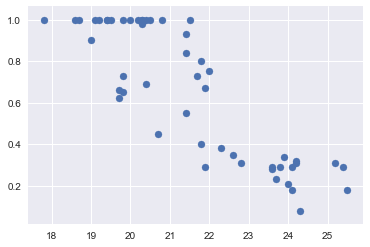

In [65]:
plt.scatter(add_act_totoal['Composite_ACT'],add_act_totoal['Participation_float_ACT'])

**ACT and SAT Participation**
 - If one state has more students taking SAT test then there is a higher chance less studetns in that state taking ACT test

**Scores and Participation for Another Test**
- if one state has higher ACT or SAT score there is a higher chance that state has higher participation rate of another test. 

**Score and Participation**

- if a state has higher ACT score, it is highly likely the state has lower participation rate for that test.

##### 26. Execute a hypothesis test comparing the SAT and ACT participation rates. Use $\alpha = 0.05$. Be sure to interpret your results.

**H0:**  SAT participation rate and ACT participation rate is not different  

**Ha:**  SAT participation rate and ACT participation rate is different

In [66]:
import scipy.stats as stats
import numpy as np

In [67]:
t,p = stats.ttest_ind(add_act_totoal['Participation_float_ACT'], add_act_totoal['Participation_float_SAT'])
t,p

(3.8085778908170544, 0.00024134203698662353)

**Conclustion**: since p-value is less than 0.05, we reject null hypothesis. 

##### 27. Generate and interpret 95% confidence intervals for SAT and ACT participation rates.

In [68]:
z = 1.96
n=len(add_act_totoal)
standard_error_SAT = np.std(add_act_totoal['Participation_float_SAT'], ddof=1)/np.sqrt(n)
ci_lower_SAT = np.mean(add_act_totoal['Participation_float_SAT']) - z *standard_error_SAT
ci_upper_SAT = np.mean(add_act_totoal['Participation_float_SAT']) + z *standard_error_SAT
ci_lower_SAT, ci_upper_SAT

(0.3012207711116876, 0.4948576602608615)

In [69]:
z = 1.96
n=len(add_act_totoal)
standard_error_ACT = np.std(add_act_totoal['Participation_float_ACT'], ddof=1)/np.sqrt(n)
ci_lower_ACT = np.mean(add_act_totoal['Participation_float_ACT']) - z *standard_error_ACT
ci_upper_ACT = np.mean(add_act_totoal['Participation_float_ACT']) + z *standard_error_ACT
ci_lower_ACT, ci_upper_ACT

(0.5643369049287186, 0.7407611342869675)

In [70]:
ci_ACT = stats.norm.interval(0.95, np.mean(add_act_totoal['Participation_float_ACT']), standard_error_ACT)
ci_SAT = stats.norm.interval(0.95, np.mean(add_act_totoal['Participation_float_SAT']), standard_error_SAT)
print(ci_ACT)
print(ci_SAT)

(0.5643385258470262, 0.74075951336866)
(0.30122255017332666, 0.4948558811992224)


Text(0.5,1,'ACT Participation% 95% CI')

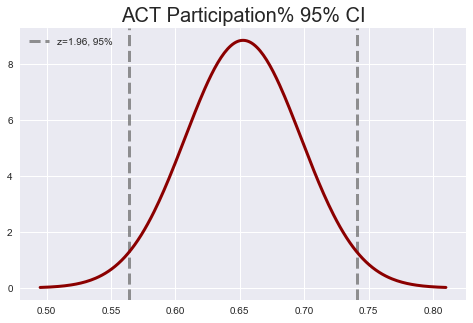

In [77]:
fig = plt.figure(figsize=(8,5))
ax = fig.gca()

zx = np.linspace(np.mean(add_act_totoal['Participation_float_ACT'])-3.5*standard_error_ACT, np.mean(add_act_totoal['Participation_float_ACT'])+3.5*standard_error_ACT, 250)

Z = stats.norm(np.mean(add_act_totoal['Participation_float_ACT']), standard_error_ACT)
zy = Z.pdf(zx)

ax.axvline(np.mean(add_act_totoal['Participation_float_ACT'])-1.96*standard_error_ACT, ls='dashed', lw=3, color='#666666', alpha=0.7)
ax.axvline(np.mean(add_act_totoal['Participation_float_ACT'])+1.96*standard_error_ACT, ls='dashed', lw=3, color='#666666', alpha=0.7, label='z=1.96, 95%')

ax.plot(zx, zy, linewidth=3, color='darkred')
ax.legend(loc='upper left')
plt.title('ACT Participation% 95% CI', size=20)

Text(0.5,1,'SAT Participation% 95% CI')

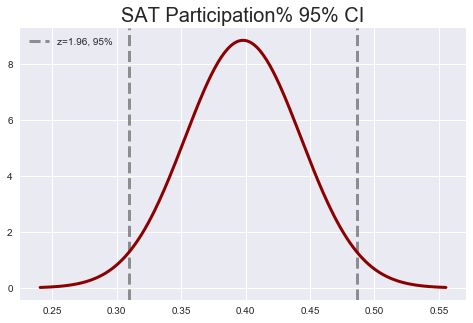

In [78]:
fig = plt.figure(figsize=(8,5))
ax = fig.gca()

zx = np.linspace(np.mean(add_act_totoal['Participation_float_SAT'])-3.5*standard_error_ACT, np.mean(add_act_totoal['Participation_float_SAT'])+3.5*standard_error_ACT, 250)

Z = stats.norm(np.mean(add_act_totoal['Participation_float_SAT']), standard_error_ACT)
zy = Z.pdf(zx)

ax.axvline(np.mean(add_act_totoal['Participation_float_SAT'])-1.96*standard_error_ACT, ls='dashed', lw=3, color='#666666', alpha=0.7)
ax.axvline(np.mean(add_act_totoal['Participation_float_SAT'])+1.96*standard_error_ACT, ls='dashed', lw=3, color='#666666', alpha=0.7, label='z=1.96, 95%')

ax.plot(zx, zy, linewidth=3, color='darkred')
ax.legend(loc='upper left')
plt.title('SAT Participation% 95% CI', size=20)

##### 28. Given your answer to 26, was your answer to 27 surprising? Why?

No, the confidence intervals we calculated from SAT and ACT is not overlaped and p-value we calculated from 26 further proved that the paricipation of two tests are different.

##### 29. Is it appropriate to generate correlation between SAT and ACT math scores? Why?

In [73]:
corr_matrix.loc[['Math_ACT'], ['Math_SAT']]

,Math_SAT
Math_ACT,-0.420456


Yes. even though these two tests have different scale but the correlation coefficient is standardized.

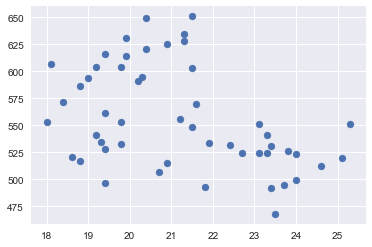

In [74]:
plt.scatter(add_act_totoal['Math_ACT'],add_act_totoal['Math_SAT'])

##### 30. Suppose we only seek to understand the relationship between SAT and ACT data in 2017. Does it make sense to conduct statistical inference given the data we have? Why?

No, the score for 2017 of two test is given, it doesn't make sense to infer the past data by using the data we already knew. 